This notebook uses previously saved data to prdocue different types of graphs that can visualize and compare a sectors or stocks alpha value

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import dataframe_image as dfi
from matplotlib.colors import TwoSlopeNorm

In [54]:
# loading previously saved data 
dataframe = pd.read_csv('stock_dataset.csv')
sector = pd.read_csv('constituents.csv')

In [55]:
# displaying S&P 500 sector breakdown
stats_df = sector.groupby('GICS Sector').agg({
    "Symbol": "count",
})
l = stats_df
dfi.export(l, "figures/SP500_breakdown.png")
l

,Symbol
GICS Sector,
Communication Services,22
Consumer Discretionary,50
Consumer Staples,38
Energy,22
Financials,72
Health Care,61
Industrials,78
Information Technology,69
Materials,28


In [96]:
# join alpha and beta data with S&P 500 data, so we can associate the sector and sub-industry with an alpha value and stock
combined_df = pd.merge(dataframe, sector, left_on = 'Ticker', right_on = 'Symbol')

In [97]:
combined_df

,Ticker,Start,End,Alpha,Beta,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,2009-01-01,2009-06-01,1.012108,0.940389,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,MMM,2009-06-01,2010-01-01,23.761503,0.963574,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,MMM,2010-01-01,2010-06-01,-0.157058,0.839192,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,MMM,2010-06-01,2011-01-01,-4.245761,0.926140,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,MMM,2011-01-01,2011-06-01,3.124263,1.041658,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,ZTS,2022-06-01,2023-01-01,-5.272815,1.026287,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952
15077,ZTS,2023-01-01,2023-06-01,3.681505,0.907690,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952
15078,ZTS,2023-06-01,2024-01-01,5.500666,1.121700,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952
15079,ZTS,2024-01-01,2024-06-01,-25.629466,1.175230,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952


# Per stock analysis

In [58]:
# print some stats
print("Mean alpha:", combined_df['Alpha'].mean())
print("Median alpha:", combined_df['Alpha'].median())
print("Max alpha:", combined_df['Alpha'].max())  
print("Min alpha:", combined_df['Alpha'].min())  

Mean alpha: 2.869600886035363
Median alpha: 2.000735184487329
Max alpha: 250.96323504843028
Min alpha: -88.35585662639127


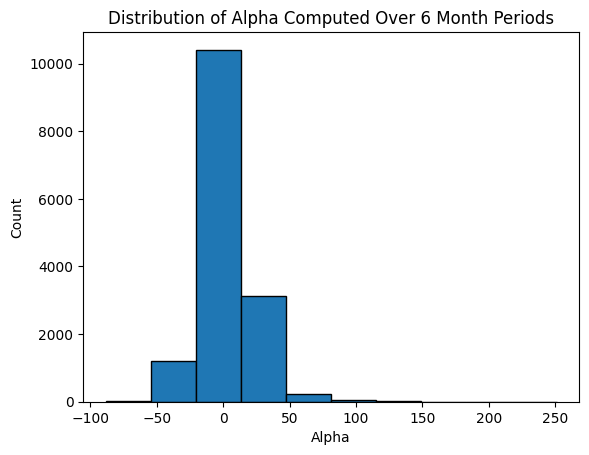

In [59]:
# combined_df: A datframe containing (most importantely) the ticker, alpha, beta, sector and sub-indsutry of a stock for every period 
# (15081 rows in total) 

# creating the histogram
plt.hist(combined_df['Alpha'], bins=10, edgecolor='black')
plt.title('Distribution of Alpha Computed Over 6 Month Periods')
plt.xlabel('Alpha')
plt.ylabel('Count')

# saving the figure locally, and displaying it
plt.savefig("figures/overall_distribution.png") 
plt.show()
plt.close()

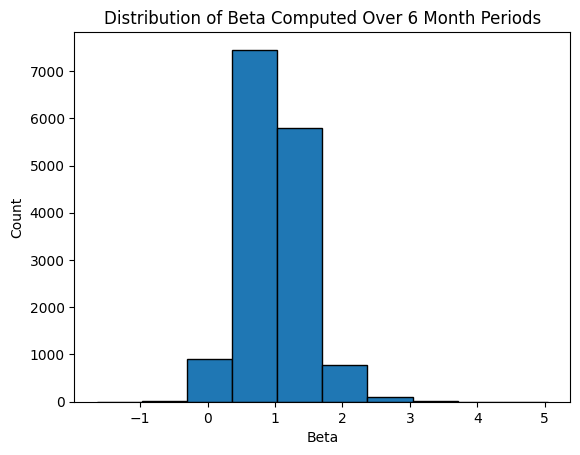

In [100]:
# creating the histogram
plt.hist(combined_df['Beta'], bins=10, edgecolor='black')
plt.title('Distribution of Beta Computed Over 6 Month Periods')
plt.xlabel('Beta')
plt.ylabel('Count')

# saving the figure locally, and displaying it
plt.savefig("figures/overall_beta_distribution.png") 
plt.show()
plt.close()

In [98]:
# 5 highest alpha values
z= combined_df.sort_values('Alpha', ascending = False).head(5)
dfi.export(z, "figures/example_rows.png")
z

,Ticker,Start,End,Alpha,Beta,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
13280,TSLA,2020-06-01,2021-01-01,250.963235,1.832308,TSLA,"Tesla, Inc.",Consumer Discretionary,Automobile Manufacturers,"Austin, Texas",2020-12-21,1318605,2003
9550,MRNA,2020-01-01,2020-06-01,222.041696,-0.099635,MRNA,Moderna,Health Care,Biotechnology,"Cambridge, Massachusetts",2021-07-21,1682852,2010
10797,PLTR,2024-06-01,2024-12-24,216.386343,2.237353,PLTR,Palantir Technologies,Information Technology,Internet Services & Infrastructure,"Denver, Colorado",2024-09-23,1321655,2003
5043,ENPH,2019-01-01,2019-06-01,199.291550,0.917698,ENPH,Enphase Energy,Information Technology,Semiconductor Materials & Equipment,"Fremont, California",2021-01-07,1463101,2006
5040,ENPH,2017-06-01,2018-01-01,194.916879,1.454283,ENPH,Enphase Energy,Information Technology,Semiconductor Materials & Equipment,"Fremont, California",2021-01-07,1463101,2006


In [99]:
# 5 lowest alpha values
combined_df.sort_values('Alpha').head(5)

,Ticker,Start,End,Alpha,Beta,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9559,MRNA,2024-06-01,2024-12-24,-88.355857,1.496450,MRNA,Moderna,Health Care,Biotechnology,"Cambridge, Massachusetts",2021-07-21,1682852,2010
2277,BLDR,2010-06-01,2011-01-01,-84.131621,2.675730,BLDR,Builders FirstSource,Industrials,Building Products,"Irving, Texas",2023-12-18,1316835,1998
191,AMD,2012-06-01,2013-01-01,-83.719447,2.218386,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
12857,SMCI,2024-06-01,2024-12-24,-76.974637,2.201769,SMCI,Supermicro,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2024-03-18,1375365,1993
12944,TMUS,2009-06-01,2010-01-01,-70.753022,0.823502,TMUS,T-Mobile US,Communication Services,Wireless Telecommunication Services,"Bellevue, Washington",2019-07-15,1283699,1994


# Alpha over time

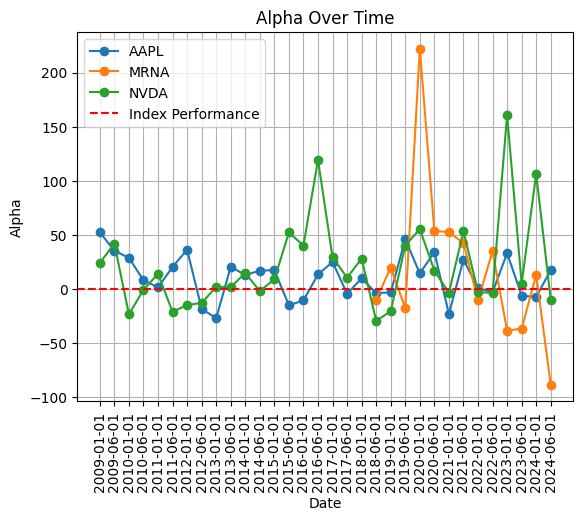

In [95]:
# plot the alpha values over time for 3 stocks to see how it (alpha) changes over time 
stock = combined_df[combined_df['Ticker']== 'AAPL'] 
stock_2 = combined_df[combined_df['Ticker']== 'MRNA'] 
stock_3 = combined_df[combined_df['Ticker']== 'NVDA'] 


# plot the data
plt.plot(stock["Start"], stock["Alpha"], marker="o", label="AAPL")
plt.plot(stock_2["Start"], stock_2["Alpha"], marker="o", label="MRNA")
plt.plot(stock_3["Start"], stock_3["Alpha"], marker="o", label="NVDA")



# add a horizontal line at y=0
plt.axhline(y=0, color="red", linestyle="--", label="Index Performance")

# customize plot
plt.title("Alpha Over Time")
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# saving and displaying the figure
plt.savefig("figures/alpha_comparisons.png", bbox_inches="tight", dpi=300)
plt.show()

In [63]:
# create a function which given the alpha value of a stock, determines if the stock in the period is classifed as underperforming
# overperforming, or roughly equal to the benchmark (given a threshold)

def get_performance(alpha):
    # below is the current threshold
    threshold = 10
    overperform = 1 if alpha > threshold else 0
    underperform = 1 if alpha < -threshold else 0
    equal =  1 if alpha >= -threshold and alpha <= threshold else 0
    return overperform, underperform, equal


In [64]:
# apply the function to compute the labels
combined_df[['outperform', 'underperform', 'equal']] = combined_df.apply(lambda row: get_performance(row['Alpha']), axis=1,result_type='expand')

In [65]:
# compute the counts of the under/over performing and equal 6-month time periods 
# compute the average alpha over all time periods

stats_df = combined_df.groupby('Ticker').agg({
    "outperform": "sum",
    "underperform": "sum",
    "equal": "sum",
    "Alpha": "mean",
})

In [66]:
stats_df

,outperform,underperform,equal,Alpha
Ticker,,,,
A,8,3,21,2.625283
AAPL,17,5,10,10.975612
ABBV,7,2,15,4.273735
ABNB,2,2,5,-0.238768
ABT,7,6,19,2.184734
...,...,...,...,...
XYL,6,6,15,1.795922
YUM,9,6,17,2.392076
ZBH,6,9,17,-1.426598


In [67]:
# stocks with most overperformance periods
a = stats_df.sort_values('outperform', ascending = False).head(5)
dfi.export(a, "figures/top_outperforming_periods.png")
a

,outperform,underperform,equal,Alpha
Ticker,,,,
NFLX,20,7,5,22.025965
TDG,20,3,9,10.307927
TSCO,19,6,7,9.350703
TPL,18,10,4,17.243682
DXCM,17,10,5,14.973772


In [68]:
# stocks with most underperformance periods
b = stats_df.sort_values('underperform', ascending = False).head(5)
dfi.export(b, "figures/top_underperforming_periods.png")
b

,outperform,underperform,equal,Alpha
Ticker,,,,
APA,4,20,8,-9.288073
FCX,9,18,5,2.194812
MOS,6,18,8,-4.790524
SLB,6,16,10,-4.881164
FSLR,10,15,7,2.396303


In [69]:
# 5 highest average alphas
c = stats_df.sort_values('Alpha', ascending = False).head(5)
dfi.export(c, "figures/top_average_alphas.png")
c

,outperform,underperform,equal,Alpha
Ticker,,,,
PLTR,4,5,0,42.087705
GEV,1,0,1,36.987600
CEG,4,0,2,32.262215
TSLA,12,6,11,28.155168
NFLX,20,7,5,22.025965


In [70]:
# 5 lowest average alphas
d = stats_df.sort_values('Alpha').head(5)
dfi.export(d, "figures/lowest_average_alphas.png")
d

,outperform,underperform,equal,Alpha
Ticker,,,,
AMTM,0,1,0,-53.948563
KVUE,0,3,1,-11.504171
APA,4,20,8,-9.288073
SOLV,0,1,1,-7.337197
DOW,3,6,3,-5.995068


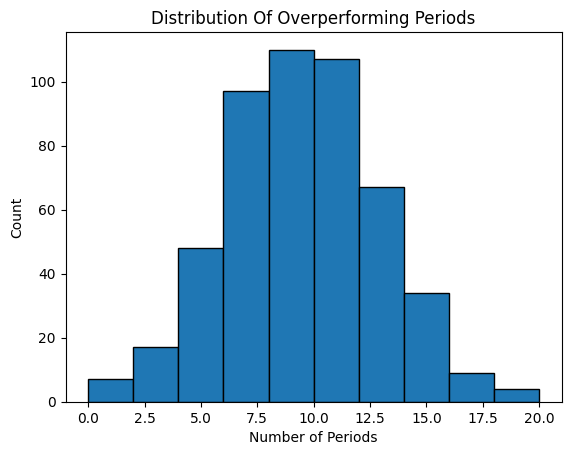

In [71]:
# plot the distribution of overperforming periods for past 15 years

plt.hist(stats_df['outperform'], bins=10, edgecolor='black')
plt.title('Distribution Of Overperforming Periods')
plt.xlabel('Number of Periods')
plt.ylabel('Count')

# save and display the figure
plt.savefig("figures/overperforming_stock_distributions.png") 
plt.show()

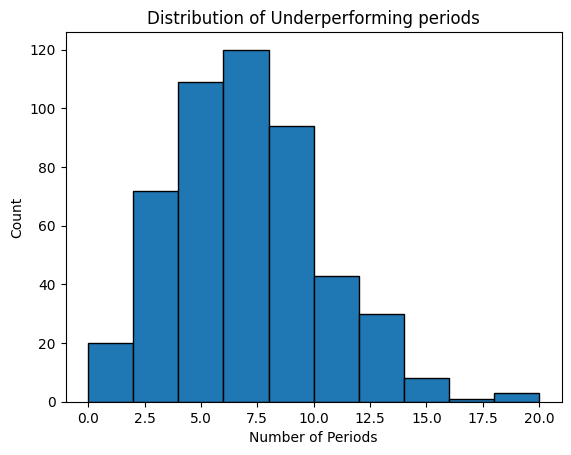

In [72]:
# plot the distribution of underperforming periods
plt.hist(stats_df['underperform'], bins=10, edgecolor='black')
plt.title('Distribution of Underperforming periods')
plt.xlabel('Number of Periods')
plt.ylabel('Count')

# save and display the figure
plt.savefig("figures/underperforming_stock_distributions.png") 
plt.show()

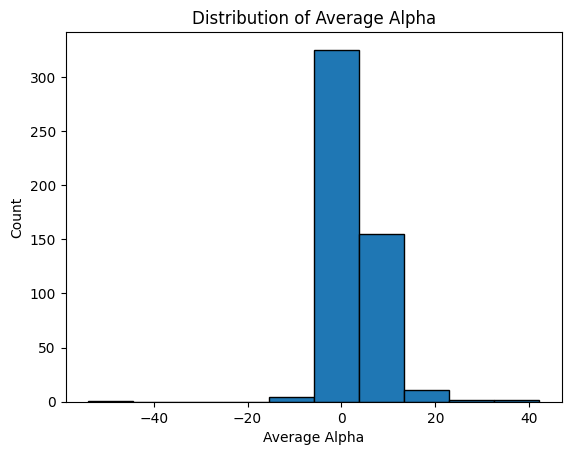

In [73]:
# plot the distribution of average alpha over all periods
plt.hist(stats_df['Alpha'], bins=10, edgecolor='black')
plt.title('Distribution of Average Alpha')
plt.xlabel('Average Alpha')
plt.ylabel('Count')

# save and display the figure
plt.savefig("figures/average_alpha_distribution.png") 
plt.show()

# Per sector analysis

## Per period

In [74]:
# group by sector and time period to compute per sector and period statistics
# count the number of over/under performing and equal periods, calculate the avergae alpha of the sector in a 6 month period
sector_stats_df = combined_df.groupby(['GICS Sector', 'Start']).agg({
    "outperform": "sum",
    "underperform": "sum",
    "equal": "sum",
    "Alpha": "mean",
    "Ticker": "nunique",
})

In [75]:
sector_stats_df

outperform  underperform  equal      Alpha  \
GICS Sector            Start                                                    
Communication Services 2009-01-01           9             3      4  13.041000   
                       2009-06-01           6             2      8   3.035430   
                       2010-01-01           8             3      6  11.525491   
                       2010-06-01           5             3      9   6.141228   
                       2011-01-01           7             3      7  13.429847   
...                                       ...           ...    ...        ...   
Utilities              2022-06-01           4             2     25   1.316807   
                       2023-01-01           0            21     10 -13.719622   
                       2023-06-01           3            10     18  -4.783993   
                       2024-01-01           5             3     23   8.587703   
                       2024-06-01           8             2     21   2.250572   

                                   Ticker  
GICS Sector            Start               
Communication Services 2009-01-01      16  
                       2009-06-01      16  
                       2010-01-01      17  
                       2010-06-01      17  
                       2011-01-01      17  
...                                   ...  
Utilities              2022-06-01      31  
                       2023-01-01      31  
                       2023-06-01      31  
                       2024-01-01      31  
                       2024-06-01      31  

[352 rows x 5 columns]

In [76]:
# to avoid skewed numbers due to a sector having more companies in it, we compute the percentage of stocks in the sector which
# under/over performed and performed equal to the benchmark

sector_stats_df['% underperform'] = (sector_stats_df['underperform'] / sector_stats_df['Ticker'])*100
sector_stats_df['% outperform'] = (sector_stats_df['outperform'] / sector_stats_df['Ticker'])*100
sector_stats_df['% equal'] = (sector_stats_df['equal'] / sector_stats_df['Ticker'])*100

In [77]:
# example
x = sector_stats_df.head(5)
dfi.export(x, "figures/percentage_performing_sectors.png")
x

outperform  underperform  equal      Alpha  \
GICS Sector            Start                                                    
Communication Services 2009-01-01           9             3      4  13.041000   
                       2009-06-01           6             2      8   3.035430   
                       2010-01-01           8             3      6  11.525491   
                       2010-06-01           5             3      9   6.141228   
                       2011-01-01           7             3      7  13.429847   

                                   Ticker  % underperform  % outperform  \
GICS Sector            Start                                              
Communication Services 2009-01-01      16       18.750000     56.250000   
                       2009-06-01      16       12.500000     37.500000   
                       2010-01-01      17       17.647059     47.058824   
                       2010-06-01      17       17.647059     29.411765   
                       2011-01-01      17       17.647059     41.176471   

                                     % equal  
GICS Sector            Start                  
Communication Services 2009-01-01  25.000000  
                       2009-06-01  50.000000  
                       2010-01-01  35.294118  
                       2010-06-01  52.941176  
                       2011-01-01  41.176471

In [78]:
# compute the average alpha of the sector over all periods
avg_alpha = combined_df.groupby(["GICS Sector", "Start"])["Alpha"].mean().reset_index()

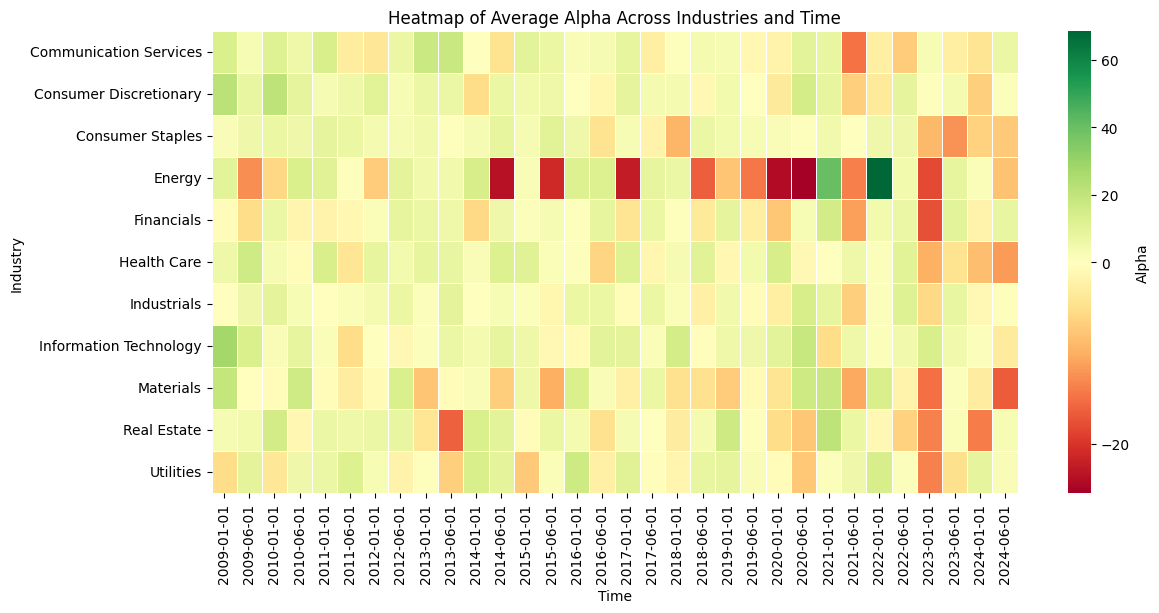

In [79]:
# plot a heatmap to represent the average alpha values of each industry for each 6 month period

# creating a new dataset - "heatmap_data" - with the average alpha of each industry for all periods
heatmap_data = sector_stats_df.reset_index().pivot(index="GICS Sector", columns="Start", values="Alpha")

# calculate the min and max alpha values for normalization
vmin = heatmap_data.min().min()  
vmax = heatmap_data.max().max()

# create a normalizer with white centered at 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# creating the heatmap using seaborn plotting
plt.figure(figsize=(13, 6))
sns.heatmap(
    heatmap_data,
    annot=False, 
    cmap="RdYlGn", 
    linewidths=0.5,
    cbar_kws={"label": "Alpha"},  # Label for color bar
    norm = norm,
)

# labeling the axis' and customizing the heatmap further
plt.title("Heatmap of Average Alpha Across Industries and Time")
plt.xlabel("Time")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels

# save and display the figure
plt.savefig("figures/alpha_heatmap.png", bbox_inches="tight", dpi=300) 
plt.show()


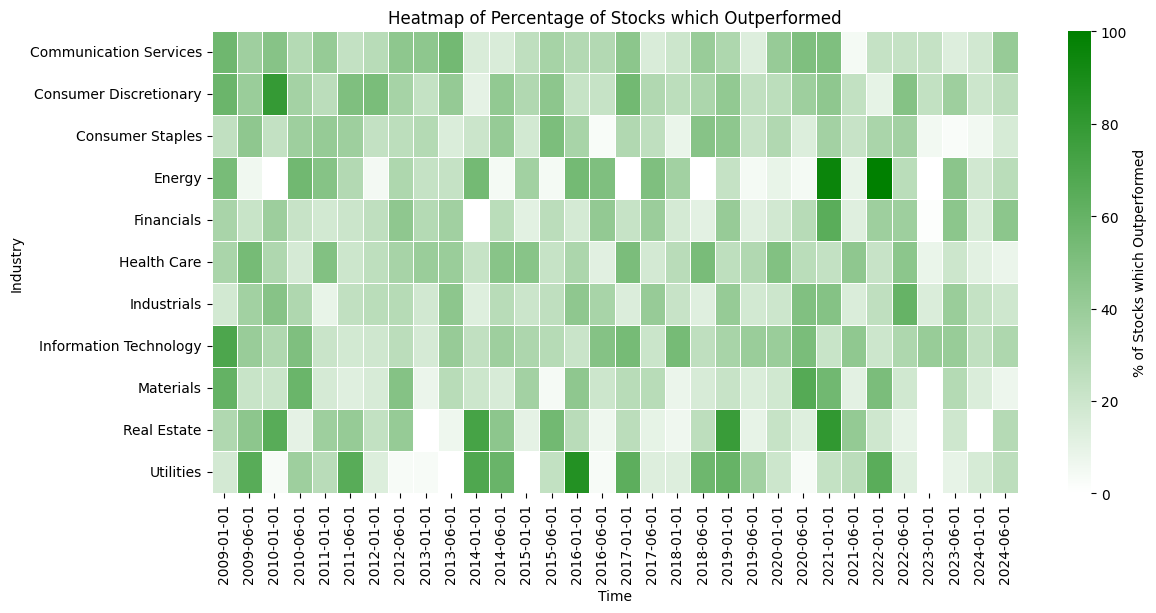

In [80]:
# plot a heatmap to represent the percentage of stocks which outperformed for each industry for each 6 month period

heatmap_data = sector_stats_df.reset_index().pivot(index="GICS Sector", columns="Start", values="% outperform")

# create the heatmap using seaborn
plt.figure(figsize=(13, 6))
custom_cmap = LinearSegmentedColormap.from_list(
    'custom', ['white', 'green'], N=256
)

sns.heatmap(
    heatmap_data,
    annot=False,  # Show values in cells
    cmap=custom_cmap,  # Color map
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"label": "% of Stocks which Outperformed"},  # Label for color bar
)

# customize plot
plt.title("Heatmap of Percentage of Stocks which Outperformed")
plt.xlabel("Time")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels

# save and display the figure
plt.savefig("figures/overperformance_heatmap.png", bbox_inches="tight", dpi=300)
plt.show()

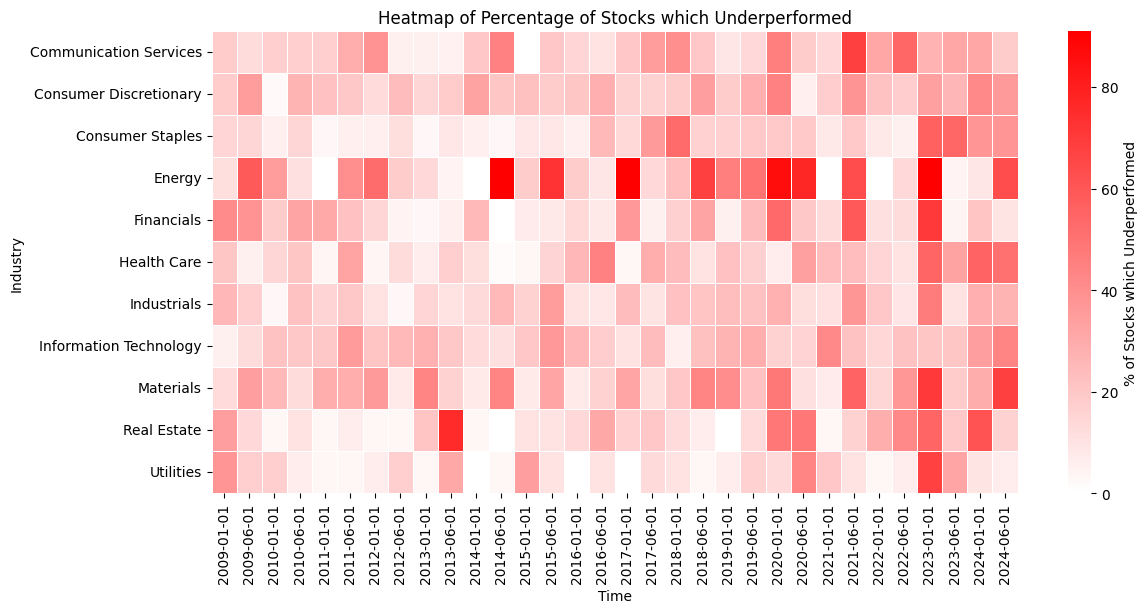

In [81]:
# plot a heatmap to represent the percentage of stocks which underperformed for each industry for each 6 month period

heatmap_data = sector_stats_df.reset_index().pivot(index="GICS Sector", columns="Start", values="% underperform")

# create the heatmap using seaborn
plt.figure(figsize=(13, 6))

custom_cmap = LinearSegmentedColormap.from_list(
    'custom', ['white', 'red'], N=256
)

sns.heatmap(
    heatmap_data,
    annot=False,  # Show values in cells
    cmap=custom_cmap,  # Color map
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"label": "% of Stocks which Underperformed"},  # Label for color bar
)

# customize plot
plt.title("Heatmap of Percentage of Stocks which Underperformed")
plt.xlabel("Time")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels

# save and display the figure
plt.savefig("figures/ounderperformance_heatmap.png", bbox_inches="tight", dpi=300) 
plt.show()

## Over all time

In [82]:
# group by sector to compute per sector statistics over all time periods
sector_total_stats_df = sector_stats_df.groupby('GICS Sector').agg({
    "outperform": "sum",
    "underperform": "sum",
    "equal": "sum",
    "Alpha": "mean",
    "Ticker": "sum",
})

In [83]:
sector_total_stats_df['% underperform'] = (sector_total_stats_df['underperform'] / sector_total_stats_df['Ticker'])*100
sector_total_stats_df['% outperform'] = (sector_total_stats_df['outperform'] / sector_total_stats_df['Ticker'])*100
sector_total_stats_df['% equal'] = (sector_total_stats_df['equal'] / sector_total_stats_df['Ticker'])*100

In [84]:
sector_total_stats_df

,outperform,underperform,equal,Alpha,Ticker,% underperform,% outperform,% equal
GICS Sector,,,,,,,,
Communication Services,198,154,286,3.369634,638,24.137931,31.034483,44.827586
Consumer Discretionary,536,365,637,4.608238,1538,23.732120,34.850455,41.417425
Consumer Staples,298,204,625,2.079395,1127,18.101154,26.441881,55.456965
Energy,197,247,235,0.366314,679,36.377025,29.013255,34.609720
Financials,602,466,1160,1.487101,2228,20.915619,27.019749,52.064632
Health Care,570,383,895,3.425902,1848,20.725108,30.844156,48.430736
Industrials,642,428,1177,3.048807,2247,19.047619,28.571429,52.380952
Information Technology,705,454,891,5.307027,2050,22.146341,34.390244,43.463415
Materials,209,231,377,0.909812,817,28.274174,25.581395,46.144431


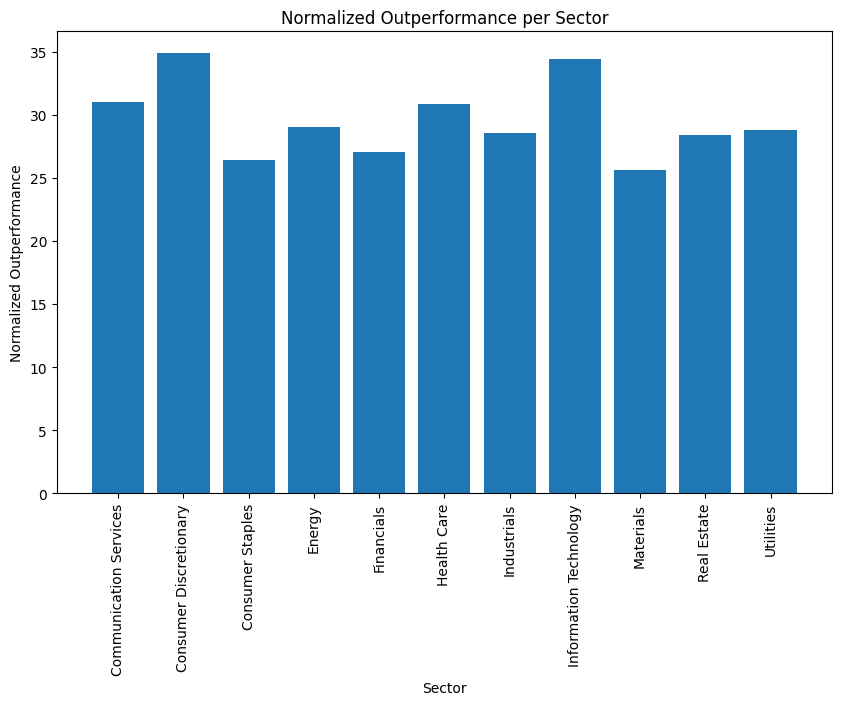

In [85]:
# create a histogram displaying the percentage of stocks in each sector which outperformed for all periods

new_df = sector_total_stats_df.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(new_df['GICS Sector'], new_df['% outperform'])

# add labels and title
plt.xlabel('Sector')
plt.ylabel('Normalized Outperformance')
plt.title('Normalized Outperformance per Sector')
plt.xticks(ticks=range(len(new_df['GICS Sector'])), labels=new_df['GICS Sector'], rotation=90) 

# save and display the figure
plt.savefig("figures/sector_overperformance_barg.png", bbox_inches="tight", dpi=300) 
plt.show()

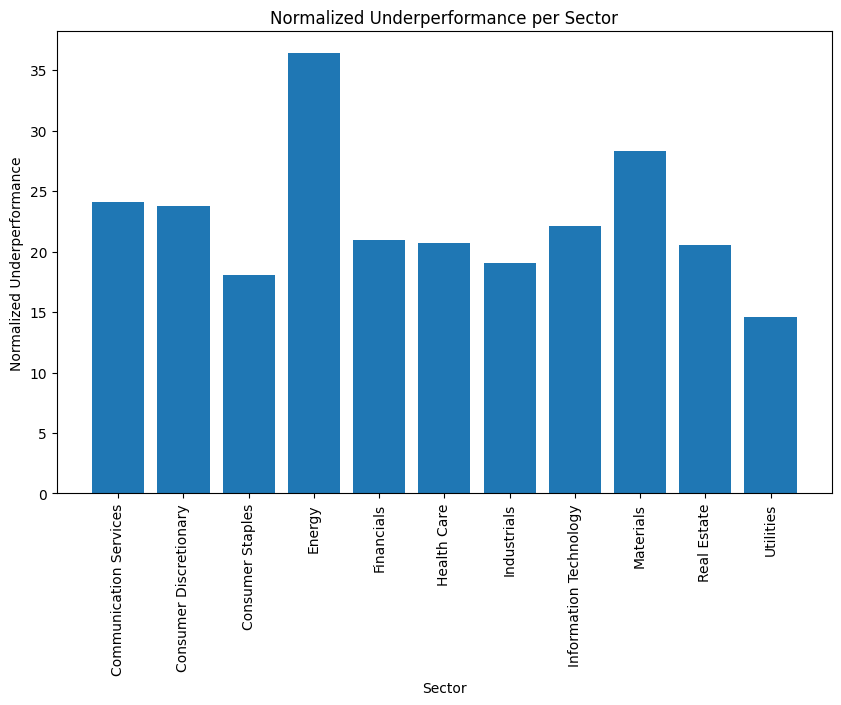

In [86]:
# create a histogram displaying the percentage of stocks in each sector which underperformed for all periods

new_df = sector_total_stats_df.reset_index()

plt.figure(figsize=(10, 6)) 
plt.bar(new_df['GICS Sector'], new_df['% underperform'])

# add labels and title
plt.xlabel('Sector')
plt.ylabel('Normalized Underperformance')
plt.title('Normalized Underperformance per Sector')
plt.xticks(ticks=range(len(new_df['GICS Sector'])), labels=new_df['GICS Sector'], rotation=90)

# save and display the figure
plt.savefig("figures/sector_underperformance_barg.png", bbox_inches="tight", dpi=300) 
plt.show()

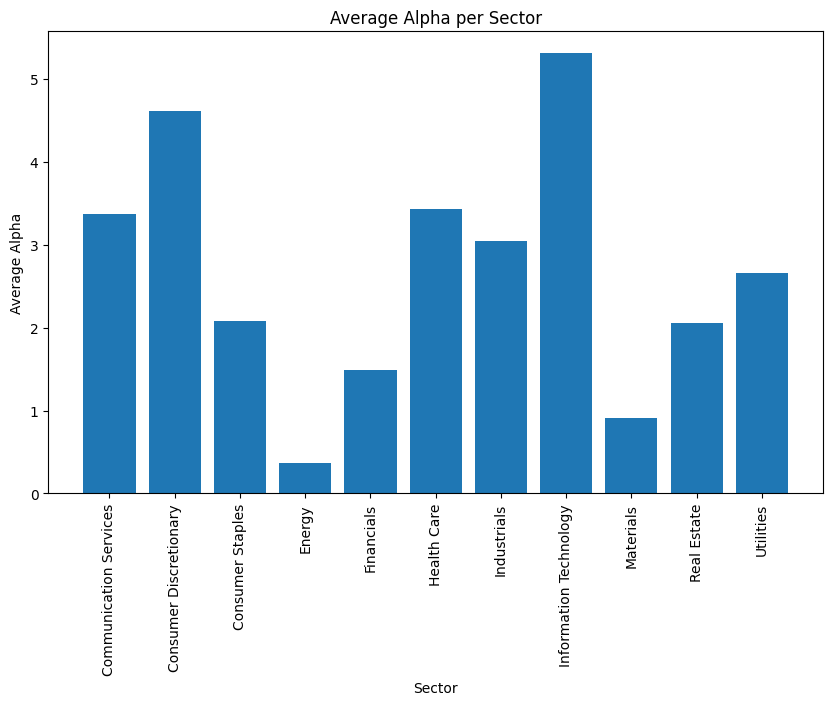

In [87]:
# create a histogram displaying the average alphga of each sector for all periods

plt.figure(figsize=(10, 6)) 
plt.bar(new_df['GICS Sector'], new_df['Alpha'])

# add labels and title
plt.xlabel('Sector')
plt.ylabel('Average Alpha')
plt.title('Average Alpha per Sector')
plt.xticks(rotation=90) 

plt.savefig("figures/avg_alpha_barg.png", bbox_inches="tight", dpi=300) 
plt.show()

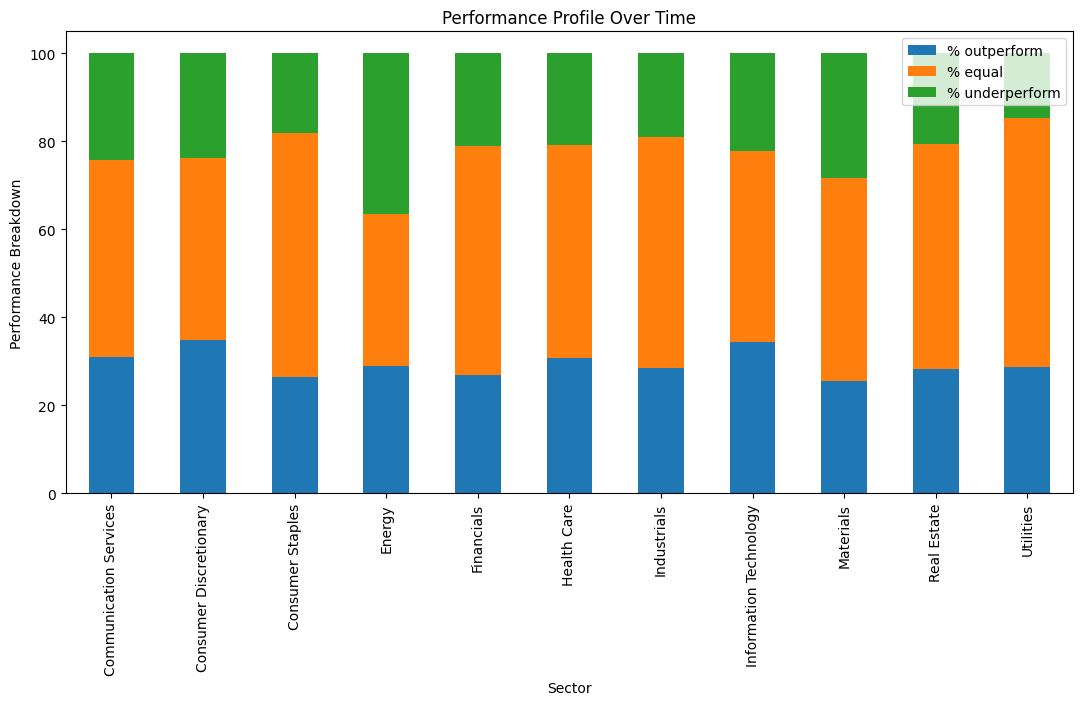

In [88]:
# create a stacked bar chart to display the performance profile of each sector in a different way 
new_df = sector_total_stats_df.reset_index()

# add labels and title
ax = new_df.plot.bar(x='GICS Sector', 
                             y=['% outperform', '% equal', '% underperform'], 
                             rot=90, 
                             title = "Performance Profile Over Time",
                             xlabel = "Sector",
                             ylabel = "Performance Breakdown",
                             stacked=True,
                             figsize=(13, 6))

#save and display the figure
plt.savefig("figures/sectors_profile.png", bbox_inches="tight", dpi=300) 

# Per subindustry analysis

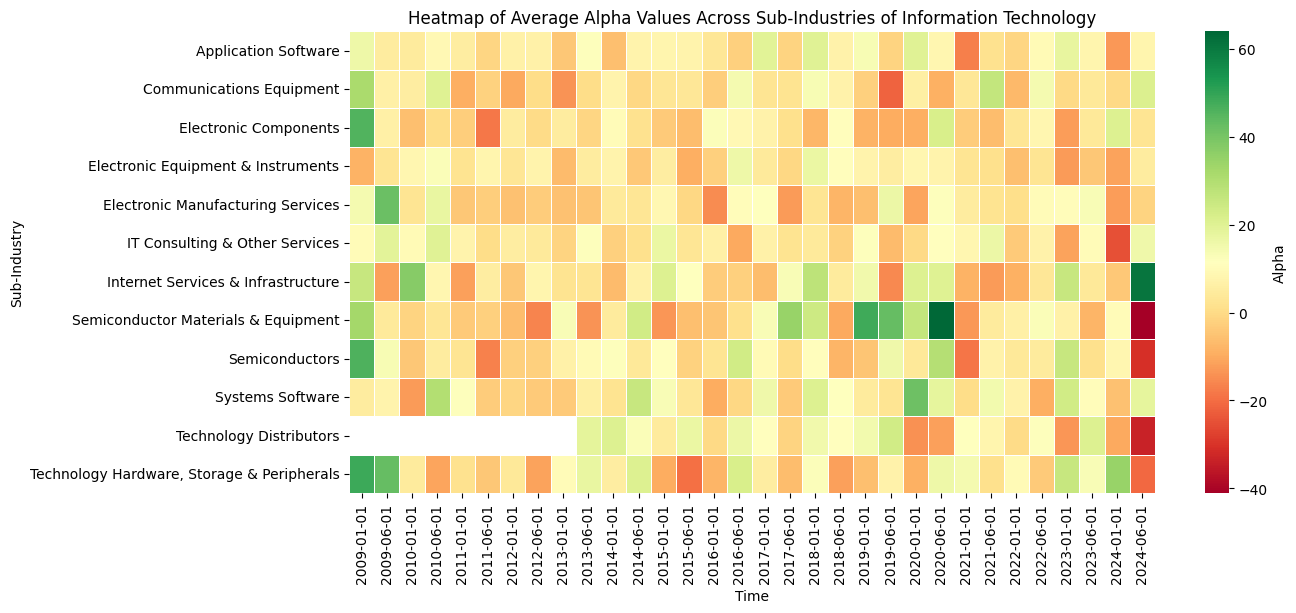

In [89]:
# create a heatmap with the average alpha value of one subindustry, in this case information technology, for all periods
computers_df = combined_df[combined_df['GICS Sector'] == 'Information Technology'].groupby(['GICS Sub-Industry', "Start"]).agg({"Alpha" : "mean"}).sort_values("Alpha")
heatmap_data = computers_df.reset_index().pivot(index="GICS Sub-Industry", columns="Start", values="Alpha")


# create the heatmap using seaborn
plt.figure(figsize=(13, 6))
sns.heatmap(
    heatmap_data,
    annot=False,  
    cmap="RdYlGn",
    linewidths=0.5, 
    cbar_kws={"label": "Alpha"},
)

# customize plot
plt.title("Heatmap of Average Alpha Values Across Sub-Industries of Information Technology")
plt.xlabel("Time")
plt.ylabel("Sub-Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels

# save and display the figure
plt.savefig("figures/sub_industry_heatmap.png", bbox_inches="tight", dpi=300) 
plt.show()

In [90]:
# displaying stock information for all stocks in the Semiconductor Materials & Equipment sub-industry in the Information Technology sector
# this was done to check why this sub-industry performed so badly in a certain period (second half of 2024)

h = combined_df[(combined_df['GICS Sector'] == 'Information Technology') & 
(combined_df['Start'] == "2024-06-01") &
(combined_df['GICS Sub-Industry'] == "Semiconductor Materials & Equipment")]

dfi.export(h, "figures/outliers_semiconductor_materials.png")
h

,Ticker,Start,End,Alpha,Beta,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,outperform,underperform,equal
1234,AMAT,2024-06-01,2024-12-24,-42.998725,2.450453,AMAT,Applied Materials,Information Technology,Semiconductor Materials & Equipment,"Santa Clara, California",1995-03-16,6951,1967,0,1,0
5054,ENPH,2024-06-01,2024-12-24,-55.742265,0.770562,ENPH,Enphase Energy,Information Technology,Semiconductor Materials & Equipment,"Fremont, California",2021-01-07,1463101,2006,0,1,0
8307,KLAC,2024-06-01,2024-12-24,-36.848576,2.490865,KLAC,KLA Corporation,Information Technology,Semiconductor Materials & Equipment,"Milpitas, California",1997-09-30,319201,1975/1977 (1997),0,1,0
8454,LRCX,2024-06-01,2024-12-24,-38.016432,2.456086,LRCX,Lam Research,Information Technology,Semiconductor Materials & Equipment,"Fremont, California",2012-06-29,707549,1980,0,1,0
13259,TER,2024-06-01,2024-12-24,-32.276270,2.410127,TER,Teradyne,Information Technology,Semiconductor Materials & Equipment,"North Reading, Massachusetts",2020-09-21,97210,1960,0,1,0


In [91]:
# displaying stock information for all stocks in the Internet Services & Infrastructure sub-industry in the Information Technology sector
# this was done to check why this sub-industry performed so well in a certain period (second half of 2024)

g = combined_df[(combined_df['GICS Sector'] == 'Information Technology') & 
(combined_df['Start'] == "2024-06-01") &
(combined_df['GICS Sub-Industry'] == "Internet Services & Infrastructure")]

dfi.export(g, "figures/outliers_internet_services.png")
g

,Ticker,Start,End,Alpha,Beta,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,outperform,underperform,equal
384,AKAM,2024-06-01,2024-12-24,-6.144609,0.771357,AKAM,Akamai Technologies,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998,0,0,1
6582,GDDY,2024-06-01,2024-12-24,32.152074,0.899360,GDDY,GoDaddy,Information Technology,Internet Services & Infrastructure,"Tempe, Arizona",2024-06-24,1609711,1997,1,0,0
10797,PLTR,2024-06-01,2024-12-24,216.386343,2.237353,PLTR,Palantir Technologies,Information Technology,Internet Services & Infrastructure,"Denver, Colorado",2024-09-23,1321655,2003,1,0,0
14103,VRSN,2024-06-01,2024-12-24,1.152374,0.551402,VRSN,Verisign,Information Technology,Internet Services & Infrastructure,"Dulles, Virginia",2006-02-01,1014473,1995,0,0,1


In [92]:
sector_df = sector_stats_df.reset_index()
this_sector_df = sector_df[sector_df["GICS Sector"] == "Information Technology"]

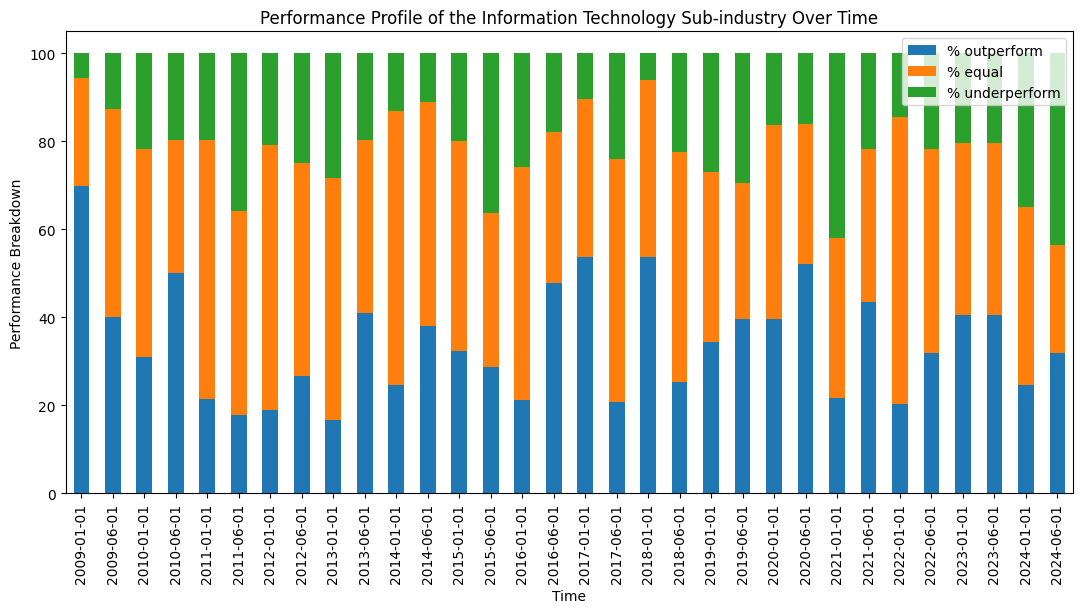

In [93]:
# create a stacked bar chart to display the performance profile of the information technology sub-industry
dx = this_sector_df.plot.bar(x='Start', 
                             y=['% outperform', '% equal', '% underperform'], 
                             rot=90, 
                             title = "Performance Profile of the Information Technology Sub-industry Over Time",
                             stacked=True, 
                             xlabel = 'Time',
                             ylabel = 'Performance Breakdown',
                             figsize=(13, 6))

plt.savefig("figures/sub_industry_performance_profile.png", bbox_inches="tight", dpi=300) 


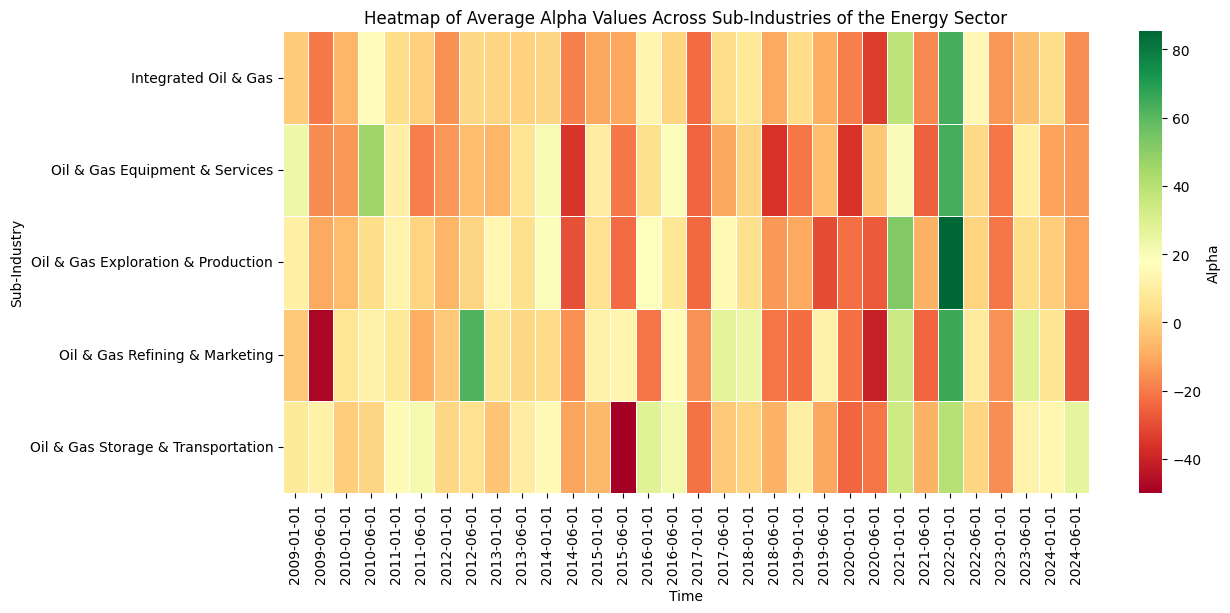

In [94]:
# create a heatmap to display the average alpha values of each sub-industry in the energy sector for each 6 month period
energy_df = combined_df[combined_df['GICS Sector'] == 'Energy'].groupby(['GICS Sub-Industry', "Start"]).agg({"Alpha" : "mean"}).sort_values("Alpha")
heatmap_data = energy_df.reset_index().pivot(index="GICS Sub-Industry", columns="Start", values="Alpha")

# create the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(
    heatmap_data,
    annot=False,  
    cmap="RdYlGn",
    linewidths=0.5, 
    cbar_kws={"label": "Alpha"}, 
)

# customize plot
plt.title("Heatmap of Average Alpha Values Across Sub-Industries of the Energy Sector")
plt.xlabel("Time")
plt.ylabel("Sub-Industry")
plt.xticks(rotation=90) 

# save and display the figure
plt.savefig("figures/energy_sub_industry_heatmap.png",bbox_inches="tight", dpi=300) 
plt.show()